In [3]:
import pandas as pd
import geopandas as gpd
import fiona
import geopandas.geoseries  
import folium
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as ctx
from shapely import wkt

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [4]:
# importing single family zoning data
zones=gpd.read_file('data/Zoning.shp')

In [5]:
zones.ZONE_SMRY.unique().tolist()

['INDUSTRIAL',
 'RESIDENTIAL',
 'AGRICULTURE',
 'COMMERCIAL',
 'PARKING',
 'PUBLIC FACILITY',
 'OPEN SPACE',
 None]

In [6]:
# subsetting
ahzones=zones.loc[zones['ZONE_SMRY'].isin(['RESIDENTIAL', 'COMMERCIAL'])].copy()
ahzones.sample(20)

,OBJECTID,ZONE_CMPLT,ZONE_CLASS,ZONE_SMRY,SHAPE_Leng,SHAPE_Area,geometry
39524,39525,R4-1,R4,RESIDENTIAL,0.002604,3.773297e-07,"POLYGON ((-118.27684 34.06830, -118.27685 34.0..."
45285,45286,RD2-1VL,RD2,RESIDENTIAL,0.004387,1.001841e-06,"POLYGON ((-118.25996 34.08908, -118.26016 34.0..."
39939,39940,R5-2,R5,RESIDENTIAL,0.003934,7.697090e-07,"POLYGON ((-118.31047 34.06245, -118.31047 34.0..."
16364,16365,R1-1,R1,RESIDENTIAL,0.024323,5.228552e-06,"POLYGON ((-118.30529 33.86190, -118.30496 33.8..."
8606,8607,C2-1VL-CPIO,C2,COMMERCIAL,0.002143,2.482411e-07,"POLYGON ((-118.34379 33.98908, -118.34379 33.9..."
58285,58286,[Q]RD1.5-1,RD1.5,RESIDENTIAL,0.004793,7.089213e-07,"POLYGON ((-118.44381 34.18681, -118.44393 34.1..."
28384,28385,R1-1,R1,RESIDENTIAL,0.003287,6.695892e-07,"POLYGON ((-118.58963 34.22258, -118.58963 34.2..."
12784,12785,C4-1,C4,COMMERCIAL,0.001532,1.360714e-07,"POLYGON ((-118.27696 34.05073, -118.27704 34.0..."
31441,31442,R2-1VL,R2,RESIDENTIAL,0.004295,7.088521e-07,"POLYGON ((-118.28027 34.08302, -118.28035 34.0..."
47325,47326,RE15-1-H,RE15,RESIDENTIAL,0.009663,2.689070e-06,"POLYGON ((-118.35629 34.11372, -118.35626 34.1..."


In [7]:
ahzones.ZONE_CLASS.unique().tolist()

['R2',
 'RE11',
 'C1',
 'C1.5',
 'C2',
 'RAS4',
 'C4',
 'CR',
 'R1',
 'R3',
 'R3P',
 'R4',
 'R4P',
 'R5',
 'RD1.5',
 'RD2',
 'RD3',
 'RD6',
 'RD4',
 'RD5',
 'RS',
 'RZ3',
 'RZ5',
 'RE20',
 'RU',
 'RE40',
 'RE9',
 'RAS3',
 'R2P',
 'USC-3',
 'C5',
 'R1P',
 'USC-1A',
 'RMP',
 'RE',
 'RZ4',
 'ADP',
 'C1(PV)',
 'USC-2',
 'USC-1B',
 'C2(PV)',
 'LASED',
 'C4(OX)',
 'CR(PKM)',
 'CW',
 'R1V2',
 'R1R3',
 'R1H1',
 'R1V1',
 'R1V3',
 'R3(PV)',
 'R4(PV)',
 'R5P',
 'RE15',
 'RSP',
 'RW1',
 'RW2',
 'RZ2.5',
 'R3(UV)',
 'RAS3(UV)',
 'PPSP',
 'PVSP']

In [8]:
ahzones_trimmed = ahzones.loc[ahzones['ZONE_CLASS'].isin(['CM','C1','C1.5','C2','RAS4','C4','CR','R3','R3P','R4','R4P','R5','RD1.5','RD2','RD3','RD6','RD4','RD5','RZ3','RZ5','RAS3','(WC)TOPANGA','C5','CM(GM)','RZ4','C4(OX)','CR(PKM)','CW','(WC)PARK','R5P','(WC)COMMERCE','(WC)DOWNTOWN','(WC)COLLEGE','(WC)NORTHVILLAGE','(WC)UPTOWN','(WC)RIVER'])].copy()

In [9]:
ahzones_trimmed.sample(10)

,OBJECTID,ZONE_CMPLT,ZONE_CLASS,ZONE_SMRY,SHAPE_Leng,SHAPE_Area,geometry
3954,3955,[Q]C4-1VL,C4,COMMERCIAL,0.002157,2.761760e-07,"POLYGON ((-118.44795 33.95943, -118.44840 33.9..."
41765,41766,RD1.5-1-CPIO,RD1.5,RESIDENTIAL,0.008403,1.306984e-06,"POLYGON ((-118.29594 34.01776, -118.29611 34.0..."
38477,38478,R3-1,R3,RESIDENTIAL,0.002692,4.299727e-07,"POLYGON ((-118.53225 34.23069, -118.53224 34.2..."
56914,56915,[Q]R3-1-RIO,R3,RESIDENTIAL,0.004469,8.435796e-07,"POLYGON ((-118.36341 34.14732, -118.36340 34.1..."
2513,2514,[Q]C2-1VL-CDO,C2,COMMERCIAL,0.002504,3.266366e-07,"POLYGON ((-118.25823 34.07771, -118.25843 34.0..."
54935,54936,(Q)R3-1,R3,RESIDENTIAL,0.003239,6.649582e-07,"POLYGON ((-118.52314 34.24767, -118.52314 34.2..."
43644,43645,RD1.5-1XL,RD1.5,RESIDENTIAL,0.004881,6.240907e-07,"POLYGON ((-118.27519 34.11460, -118.27519 34.1..."
685,686,[Q]C2-1VL-CUGU,C2,COMMERCIAL,0.002790,4.487126e-07,"POLYGON ((-118.26292 33.77751, -118.26342 33.7..."
9595,9596,C2-1,C2,COMMERCIAL,0.001485,1.300201e-07,"POLYGON ((-118.29258 34.09563, -118.29280 34.0..."
56004,56005,(T)(Q)R3-1-CUGU,R3,RESIDENTIAL,0.002577,2.359871e-07,"POLYGON ((-118.22079 34.04546, -118.22082 34.0..."


In [10]:
ahzones_trimmed = ahzones_trimmed.to_crs(epsg=3857)

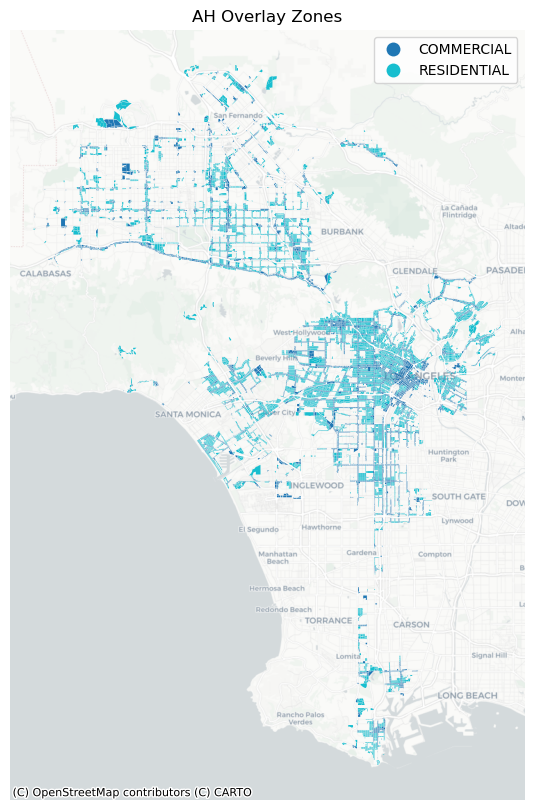

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
ahzones_trimmed.plot(
                 column='ZONE_SMRY',
                 legend=True, 
                 ax=ax)
ax.axis('off')

ax.set_title('AH Overlay Zones')

ctx.add_basemap(ax, crs=3857, source=ctx.providers.CartoDB.Positron)

In [12]:
ahzones_trimmed['parcelarea_km2'] = ahzones_trimmed.area / 1000**2

In [13]:
neighborhoods = gpd.read_file("https://services5.arcgis.com/7nsPwEMP38bSkCjy/arcgis/rest/services/LA_Times_Neighborhoods/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")

In [14]:
neighborhoods = neighborhoods.to_crs(epsg=3857)

In [15]:
#getting a column to calculate the area of each tier category
neighborhoods['nhoodarea_km2'] = neighborhoods.area / 1000**2

In [16]:
# reducing by 18% to account for road areas within neighborhoods 
neighborhoods['nhoodarea_km2_adjusted'] = neighborhoods['nhoodarea_km2'] * (1-0.18)
neighborhoods.head(10)

,OBJECTID,name,geometry,nhoodarea_km2,nhoodarea_km2_adjusted
0,1,Adams-Normandie,"POLYGON ((-13169172.148 4033813.466, -13169528...",3.033185,2.487212
1,2,Arleta,"POLYGON ((-13184963.897 4064322.573, -13184947...",11.868373,9.732066
2,3,Arlington Heights,"POLYGON ((-13171168.886 4035928.895, -13170957...",3.904006,3.201285
3,4,Atwater Village,"MULTIPOLYGON (((-13166742.025 4049392.844, -13...",6.746446,5.532086
4,5,Baldwin Hills/Crenshaw,"POLYGON ((-13175888.722 4032201.832, -13175804...",10.833235,8.883253
5,6,Bel-Air,"POLYGON ((-13187090.248 4046375.305, -13186992...",23.999252,19.679387
6,7,Beverly Crest,"POLYGON ((-13183466.687 4039441.999, -13183487...",30.708971,25.181356
7,8,Beverly Grove,"POLYGON ((-13177167.561 4040928.302, -13177166...",6.275320,5.145762
8,9,Beverlywood,"POLYGON ((-13178679.451 4035081.028, -13179041...",3.006329,2.465190
9,10,Boyle Heights,"POLYGON ((-13157143.296 4036964.855, -13157140...",24.535939,20.119470


<AxesSubplot: >

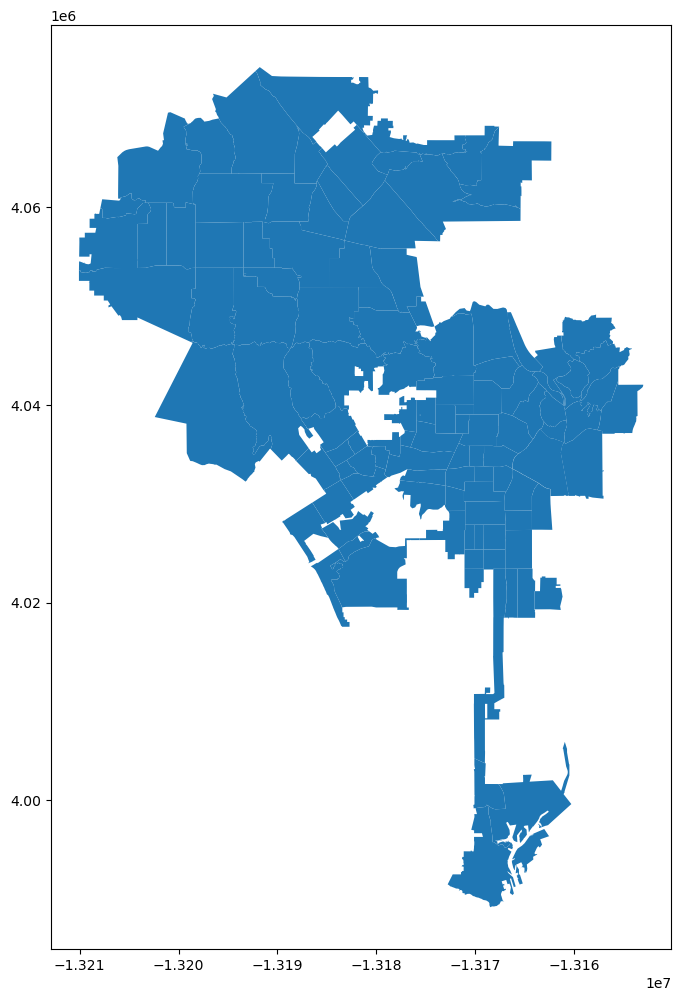

In [17]:
neighborhoods.plot(figsize=(12,12))

In [18]:
ahzones_union = gpd.overlay(neighborhoods, ahzones_trimmed, how = 'union')

In [19]:
ahzones_union.sample(10)

,OBJECTID_1,name,nhoodarea_km2,nhoodarea_km2_adjusted,OBJECTID_2,ZONE_CMPLT,ZONE_CLASS,ZONE_SMRY,SHAPE_Leng,SHAPE_Area,parcelarea_km2,geometry
7953,50.0,Hollywood,13.362532,10.957276,12967.0,C4-1-SN,C4,COMMERCIAL,0.001911,2.201798e-07,0.003295,"POLYGON ((-13171160.641 4042479.790, -13171160..."
18769,95.0,Valley Glen,18.147437,14.880898,53201.0,[Q]RD1.5-1,RD1.5,RESIDENTIAL,0.003027,2.901123e-07,0.004346,"POLYGON ((-13184413.674 4052857.171, -13184277..."
3480,24.0,Downtown,22.044779,18.076719,56041.0,[T][Q]C2-2D-RIO,C2,COMMERCIAL,0.004971,1.282840e-06,0.019187,"POLYGON ((-13161854.207 4035458.934, -13161871..."
3741,26.0,East Hollywood,9.076463,7.442700,6433.0,[Q]R4-2,R4,RESIDENTIAL,0.002784,4.822719e-07,0.007217,"POLYGON ((-13169956.101 4041656.138, -13169956..."
18162,93.0,Tujunga,37.501759,30.751443,12009.0,C2-1VL,C2,COMMERCIAL,0.005114,7.455395e-07,0.011177,"POLYGON ((-13167322.840 4062161.507, -13167325..."
17162,88.0,Sunland,15.020253,12.316608,10486.0,C2-1L,C2,COMMERCIAL,0.002479,2.576944e-07,0.003864,"POLYGON ((-13171671.948 4063752.616, -13171776..."
19842,97.0,Van Nuys,34.269617,28.101086,57973.0,C2-1VL-RIO,C2,COMMERCIAL,0.007372,1.258954e-06,0.018857,"POLYGON ((-13187450.262 4051954.555, -13187468..."
12670,68.0,Northridge,36.014390,29.531799,53419.0,(Q)C2-1VL,C2,COMMERCIAL,0.014639,2.510150e-06,0.037625,"POLYGON ((-13191625.395 4060409.724, -13191625..."
7814,50.0,Hollywood,13.362532,10.957276,2823.0,[Q]C2-1VL,C2,COMMERCIAL,0.001704,1.553855e-07,0.002325,"POLYGON ((-13171640.175 4040447.915, -13171640..."
12812,69.0,Pacific Palisades,86.226345,70.705603,6798.0,[Q]RD2-1,RD2,RESIDENTIAL,0.002204,2.279828e-07,0.003410,"POLYGON ((-13195722.507 4035317.839, -13195721..."


In [19]:
#droppping extra columns
ahzones_union = ahzones_union[['name','nhoodarea_km2','nhoodarea_km2_adjusted','ZONE_CMPLT','ZONE_CLASS','ZONE_SMRY','SHAPE_Leng','SHAPE_Area','parcelarea_km2','geometry']]

In [20]:
ahzones_union.sample(10)

,name,nhoodarea_km2,nhoodarea_km2_adjusted,ZONE_CMPLT,ZONE_CLASS,ZONE_SMRY,SHAPE_Leng,SHAPE_Area,parcelarea_km2,geometry
5299,Mission Hills,12.191876,9.997339,[Q]CR-1,CR,COMMERCIAL,0.000998,6.167271e-08,0.000925,"POLYGON ((-13188161.064 4063425.215, -13188176..."
11170,Winnetka,18.227153,14.946265,C2-1L,C2,COMMERCIAL,0.003534,5.397991e-07,0.008090,"POLYGON ((-13199490.252 4058486.815, -13199490..."
3214,Harbor City,9.672402,7.931370,[Q]R3-1VL,R3,RESIDENTIAL,0.001134,7.135677e-08,0.001064,"POLYGON ((-13169902.072 4001424.098, -13169914..."
1117,Canoga Park,16.434153,13.476006,C2-1VL,C2,COMMERCIAL,0.001664,1.643936e-07,0.002463,"POLYGON ((-13203411.265 4055843.977, -13203422..."
4941,Mid-City,13.139033,10.774007,C2-1VL-O-CPIO,C2,COMMERCIAL,0.001377,1.061902e-07,0.001588,"POLYGON ((-13173602.369 4034099.329, -13173599..."
3340,Harvard Heights,2.938028,2.409183,C2-1VL-HPOZ-CPIO,C2,COMMERCIAL,0.001943,1.953684e-07,0.002922,"POLYGON ((-13170086.646 4034792.420, -13170086..."
6581,Pico-Union,6.211537,5.093460,C2-1,C2,COMMERCIAL,0.002764,2.631952e-07,0.003937,"POLYGON ((-13167866.877 4035786.448, -13167866..."
5030,Mid-City,13.139033,10.774007,C2-1-O,C2,COMMERCIAL,0.001937,2.153474e-07,0.003221,"POLYGON ((-13177526.414 4035589.391, -13177526..."
9552,Vermont Square,9.547767,7.829169,C2-1VL-CPIO,C2,COMMERCIAL,0.001649,1.665115e-07,0.002489,"POLYGON ((-13167737.982 4029315.483, -13167737..."
6912,San Pedro,40.484229,33.197068,[Q]C2-1XL,C2,COMMERCIAL,0.001214,9.044717e-08,0.001348,"POLYGON ((-13167228.013 3992572.410, -13167242..."


<AxesSubplot: >

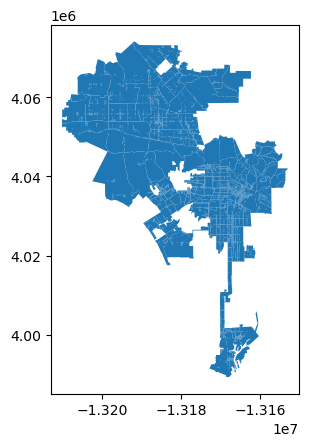

In [21]:
ahzones_union.plot()

In [22]:
# dropping columns
ahzones_areas = ahzones_union[['name','nhoodarea_km2_adjusted','parcelarea_km2','geometry']]
ahzones_areas.head(10)

,name,nhoodarea_km2_adjusted,parcelarea_km2,geometry
0,Adams-Normandie,2.487212,0.007133,"POLYGON ((-13168289.581 4033262.875, -13168280..."
1,Adams-Normandie,2.487212,0.002926,"POLYGON ((-13169982.257 4032251.919, -13169993..."
2,Adams-Normandie,2.487212,0.006830,"POLYGON ((-13170031.464 4032399.546, -13170031..."
3,Adams-Normandie,2.487212,0.020078,"POLYGON ((-13168169.924 4033134.208, -13168169..."
4,Adams-Normandie,2.487212,0.012238,"POLYGON ((-13168883.208 4033265.681, -13168859..."
5,Adams-Normandie,2.487212,0.017192,"POLYGON ((-13168772.558 4032284.428, -13168821..."
6,Adams-Normandie,2.487212,0.017049,"POLYGON ((-13168892.751 4032284.295, -13168941..."
7,Adams-Normandie,2.487212,0.018963,"POLYGON ((-13168772.191 4032481.887, -13168821..."
8,Adams-Normandie,2.487212,0.018838,"POLYGON ((-13168892.191 4032481.755, -13168913..."
9,Adams-Normandie,2.487212,0.018634,"POLYGON ((-13169011.483 4032481.624, -13169059..."


In [23]:
ahzones_areas['Pct_Covered'] = ahzones_areas['parcelarea_km2'] / ahzones_areas['nhoodarea_km2_adjusted'] * 100
ahzones_areas.sample(10)

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,name,nhoodarea_km2_adjusted,parcelarea_km2,geometry,Pct_Covered
9347,Vermont Knolls,3.555019,0.003978,"POLYGON ((-13168246.648 4024708.858, -13168246...",0.111909
7164,Sawtelle,8.331300,0.011108,"POLYGON ((-13185129.186 4034467.222, -13185128...",0.133323
4101,Hyde Park,8.901471,0.001613,"POLYGON ((-13172514.003 4026011.846, -13172513...",0.018120
9390,Vermont-Slauson,4.482642,0.002185,"POLYGON ((-13168174.882 4027879.581, -13168169...",0.048752
2782,Florence,8.654060,0.016263,"POLYGON ((-13166739.797 4026933.501, -13166739...",0.187926
7800,Studio City,19.405909,0.004911,"POLYGON ((-13176034.397 4048178.866, -13176046...",0.025305
6022,Pacoima,22.296324,0.006472,"POLYGON ((-13182498.072 4061937.530, -13182531...",0.029029
844,Brentwood,46.782128,0.013492,"POLYGON ((-13187324.113 4036124.931, -13187324...",0.028841
2120,Echo Park,7.427830,0.000803,"POLYGON ((-13164677.732 4039831.071, -13164701...",0.010816
4456,Koreatown,8.402691,0.011111,"POLYGON ((-13170129.616 4038898.430, -13170133...",0.132228


In [24]:
ahzones_neighborhoods = ahzones_areas.groupby(['name']).sum()

/tmp/ipykernel_6099/3821803201.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ahzones_neighborhoods = ahzones_areas.groupby(['name']).sum()


In [1]:
ahzones_neighborhoods = ahzones_neighborhoods.sort_values(by='Pct_Covered',ascending=False)
ahzones_neighborhoods.head(114)

NameError: name 'ahzones_neighborhoods' is not defined

In [2]:
ahzones_neighborhoods.tail(10)

NameError: name 'ahzones_neighborhoods' is not defined